In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [2]:
df = pd.read_csv(r"C:\Users\NAVADEEP\Downloads\Navadeep bank.csv")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of        age            job  marital  education default  balance housing loan  \
0       58     management  married   tertiary      no     2143     yes   no   
1       44     technician   single  secondary      no       29     yes   no   
2       33   entrepreneur  married  secondary      no        2     yes  yes   
3       47    blue-collar  married    unknown      no     1506     yes   no   
4       33        unknown   single    unknown      no        1      no   no   
...    ...            ...      ...        ...     ...      ...     ...  ...   
49727   33       services  married  secondary      no     -333     yes   no   
49728   57  self-employed  married   tertiary     yes    -3313     yes  yes   
49729   57     technician  married  secondary      no      295      no   no   
49730   28    blue-collar  married  secondary      no     1137      no   no   
49731   44   entrepreneur   single   tertiary      no     1136     yes  yes   

        

In [5]:
df.isnull

<bound method DataFrame.isnull of        age            job  marital  education default  balance housing loan  \
0       58     management  married   tertiary      no     2143     yes   no   
1       44     technician   single  secondary      no       29     yes   no   
2       33   entrepreneur  married  secondary      no        2     yes  yes   
3       47    blue-collar  married    unknown      no     1506     yes   no   
4       33        unknown   single    unknown      no        1      no   no   
...    ...            ...      ...        ...     ...      ...     ...  ...   
49727   33       services  married  secondary      no     -333     yes   no   
49728   57  self-employed  married   tertiary     yes    -3313     yes  yes   
49729   57     technician  married  secondary      no      295      no   no   
49730   28    blue-collar  married  secondary      no     1137      no   no   
49731   44   entrepreneur   single   tertiary      no     1136     yes  yes   

        contact  

In [7]:
le = LabelEncoder()
for columns in df.select_dtypes(include='object').columns:
    df[columns]=le.fit_transform(df[columns])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [8]:
X = df.drop('y',axis=1)
y = df["y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)


In [9]:
dt_model = DecisionTreeClassifier(criterion='entropy',random_state=42)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [18]:
y_pred = dt_model.predict(X_test)
print("accuracy_score:", accuracy_score(y_test, y_pred))
print("classification_report:\n", classification_report(y_test, y_pred))

accuracy_score: 0.8792692385028581
classification_report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93     30733
           1       0.49      0.51      0.50      4080

    accuracy                           0.88     34813
   macro avg       0.71      0.72      0.71     34813
weighted avg       0.88      0.88      0.88     34813



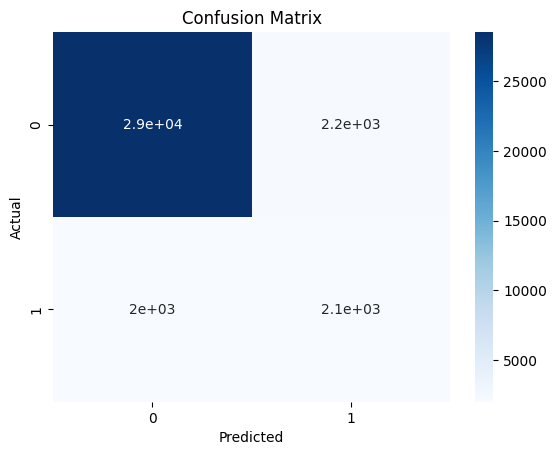

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
